## **Tpot**


Automated machine learning (AutoML) takes a higher-level approach to machine learning than most practitioners are used to, so we've gathered a handful of guidelines on what to expect when running AutoML software such as TPOT.

**AutoML algorithms aren't intended to run for only a few minutes**

Of course, you can run TPOT for only a few minutes and it will find a reasonably good pipeline for your dataset. However, if you don't run TPOT for long enough, it may not find the best possible pipeline for your dataset. It may even not find any suitable pipeline at all, in which case a *RuntimeError('A pipeline has not yet been optimized*. Please call fit() first.') will be raised. Often it is worthwhile to run multiple instances of TPOT in parallel for a long time (hours to days) to allow TPOT to thoroughly search the pipeline space for your dataset.

In [1]:
!pip install tpot

     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 163kB 8.7MB/s 
     |████████████████████████████████| 157.5MB 73kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=825d2be4cc59e346fa34c796b4d1803236ad94bd33f72dcb077a0ba77e8c1741
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
from tpot import TPOTClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

(1797, 64)


<Figure size 432x288 with 0 Axes>

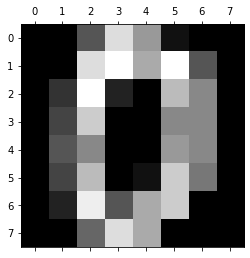

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

As such, TPOT will take a while to run on larger datasets, but it's important to realize why. With the default TPOT settings (100 generations with 100 population size), TPOT will evaluate 10,000 pipeline configurations before finishing. To put this number into context, think about **a grid search of 10,000 hyperparameter combinations for a machine learning algorithm and how long that grid search will take**. That is 10,000 model configurations to evaluate with 10-fold cross-validation, which means that roughly 100,000 models are fit and evaluated on the training data in one grid search. That's a time-consuming procedure, even for simpler models like decision trees.

**GENERATIONS**: Number of iterations to run the pipeline optimization process. It must be a positive number or None. If None, the parameter max_time_mins must be defined as the runtime limit. Generally, TPOT will work better when you give it more generations (and therefore time) to optimize the pipeline.

TPOT will evaluate POPULATION_SIZE + GENERATIONS x OFFSPRING_SIZE pipelines in total.

**POPULATION_SIZE**: Number of individuals to retain in the GP population every generation. Generally, TPOT will work better when you give it more individuals (and therefore time) to optimize the pipeline. 

TPOT will evaluate POPULATION_SIZE + GENERATIONS x OFFSPRING_SIZE pipelines in total.

In [5]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline.py')


Generation 1 - Current best internal CV score: 0.9844058928817294

Generation 2 - Current best internal CV score: 0.9851493873055212

Generation 3 - Current best internal CV score: 0.9851493873055212

Generation 4 - Current best internal CV score: 0.9851493873055212

Generation 5 - Current best internal CV score: 0.9851493873055212

Best pipeline: KNeighborsClassifier(BernoulliNB(input_matrix, alpha=0.1, fit_prior=False), n_neighbors=3, p=2, weights=distance)
0.9866666666666667


## Et Voilà!! 

## **autokeras**


AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University. The goal of AutoKeras is to make machine learning accessible for everyone.



In [36]:
!pip install keras-tuner

In [37]:
!pip install autokeras

In [38]:
# load the sonar dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split


In [39]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
dataframe = read_csv(url, header=None)
print(dataframe.shape)

(63, 2)


In [40]:
dataframe.head()

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [41]:
# split into input and output elements
data = dataframe.values
data = data.astype('float32')
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(63, 1) (63,)


In [42]:
print(X)

[[108.]
 [ 19.]
 [ 13.]
 [124.]
 [ 40.]
 [ 57.]
 [ 23.]
 [ 14.]
 [ 45.]
 [ 10.]
 [  5.]
 [ 48.]
 [ 11.]
 [ 23.]
 [  7.]
 [  2.]
 [ 24.]
 [  6.]
 [  3.]
 [ 23.]
 [  6.]
 [  9.]
 [  9.]
 [  3.]
 [ 29.]
 [  7.]
 [  4.]
 [ 20.]
 [  7.]
 [  4.]
 [  0.]
 [ 25.]
 [  6.]
 [  5.]
 [ 22.]
 [ 11.]
 [ 61.]
 [ 12.]
 [  4.]
 [ 16.]
 [ 13.]
 [ 60.]
 [ 41.]
 [ 37.]
 [ 55.]
 [ 41.]
 [ 11.]
 [ 27.]
 [  8.]
 [  3.]
 [ 17.]
 [ 13.]
 [ 13.]
 [ 15.]
 [  8.]
 [ 29.]
 [ 30.]
 [ 24.]
 [  9.]
 [ 31.]
 [ 14.]
 [ 53.]
 [ 26.]]


In [43]:
print(y)

[392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3  20.9 248.1
  23.5  39.6  48.8   6.6 134.9  50.9   4.4 113.   14.8  48.7  52.1  13.2
 103.9  77.5  11.8  98.1  27.9  38.1   0.   69.2  14.6  40.3 161.5  57.2
 217.6  58.1  12.6  59.6  89.9 202.4 181.3 152.8 162.8  73.4  21.3  92.6
  76.1  39.9 142.1  93.   31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8
  95.5 244.6 187.5]


In [44]:
# separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(42, 1) (21, 1) (42,) (21,)


In [58]:
# define the search
from autokeras import StructuredDataRegressor
search = StructuredDataRegressor(max_trials=15, loss='mean_absolute_error')


INFO:tensorflow:Reloading Oracle from existing project ./structured_data_regressor/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_regressor/tuner0.json


In [59]:
# perform the search
search.fit(x=X_train, y=y_train, verbose=1)

INFO:tensorflow:Oracle triggered exit
Epoch 1/19
2/2 [==============================] - 0s 8ms/step - loss: 81.3777 - mean_squared_error: 11468.9106
Epoch 2/19
2/2 [==============================] - 0s 6ms/step - loss: 73.9340 - mean_squared_error: 9542.6979
Epoch 3/19
2/2 [==============================] - 0s 6ms/step - loss: 54.2171 - mean_squared_error: 5407.4801
Epoch 4/19
2/2 [==============================] - 0s 7ms/step - loss: 36.3071 - mean_squared_error: 2065.1079
Epoch 5/19
2/2 [==============================] - 0s 6ms/step - loss: 41.9867 - mean_squared_error: 2985.7707
Epoch 6/19
2/2 [==============================] - 0s 6ms/step - loss: 34.3417 - mean_squared_error: 1870.2742
Epoch 7/19
2/2 [==============================] - 0s 6ms/step - loss: 34.6093 - mean_squared_error: 1862.4258
Epoch 8/19
2/2 [==============================] - 0s 6ms/step - loss: 35.3051 - mean_squared_error: 2158.1404
Epoch 9/19
2/2 [==============================] - 0s 6ms/step - loss: 33.4155 - m

In [61]:
# evaluate the model
mae, _ = search.evaluate(X_test, y_test, verbose=0)
print('MAE: %.3f' % mae)

MAE: 24.231


In [62]:
import numpy as np
X_new = np.asarray([[108]]).astype('float32')
yhat = search.predict(X_new)
print('Predicted: %.3f' % yhat[0])

Predicted: 377.969


In [63]:
# get the best performing model
model = search.export_model()

In [64]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 1)                 0         
_________________________________________________________________
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [65]:
# save the best performing model to file
model.save('model_insurance.h5')